## Загрузка данных 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import  LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

ModuleNotFoundError: No module named 'catboost'

In [5]:
df = pd.read_csv('Airbnb_Data.csv')
df

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,14549287,4.605170,Apartment,Private room,{},1,1.0,Real Bed,flexible,False,...,40.709025,-73.939405,one room bushwick,Williamsburg,0,NaN,https://a0.muscache.com/im/pictures/55162426/6...,11206.0,1.0,1.0
74107,13281809,5.043425,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,2.0,Real Bed,moderate,True,...,33.871549,-118.396053,Spacious Hermosa 2 BR on PCH,Hermosa Beach,16,93.0,https://a0.muscache.com/im/pictures/2b86560b-a...,90254,2.0,4.0
74108,18688039,5.220356,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",5,1.0,Real Bed,moderate,True,...,40.706749,-73.942377,Modern 2 Bedroom Apartment in Williamsburg,Williamsburg,43,94.0,https://a0.muscache.com/im/pictures/7fbe448c-5...,11206.0,2.0,2.0
74109,17045948,5.273000,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,Real Bed,strict,True,...,40.738535,-74.000157,Designer's Apartment in HEART of NYC,West Village,0,NaN,https://a0.muscache.com/im/pictures/b3971b63-0...,10011,0.0,2.0


Описание полей:
id, 
'log_price', 
'property_type', 
'room_type', 
'amenities',
'accommodates', 
'bathrooms', 
'bed_type', 
'cancellation_policy' - политика отмены бронирования,
'cleaning_fee', 
'city', 
'description', 
'first_review',
'host_has_profile_pic', 
'host_identity_verified', 
'host_response_rate',
'host_since', 
'instant_bookable', 
'last_review', 
'latitude',
'longitude', 
'name', 
'neighbourhood' - район расположения, 
'number_of_reviews',
'review_scores_rating', 
'thumbnail_url', 
'zipcode', 
'bedrooms', 
'beds'

## Обработка данных

In [6]:
df.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

### 1.Обработка пропусков

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


### 2.Обработка выбросов

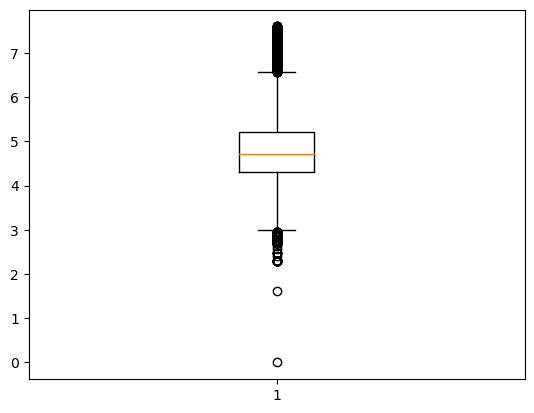

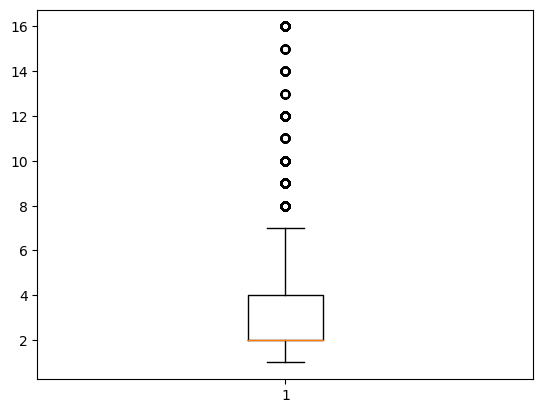

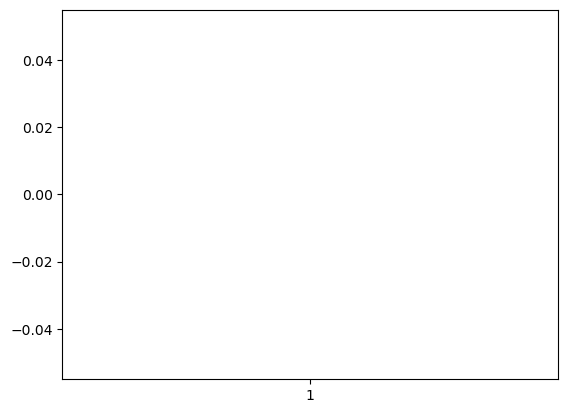

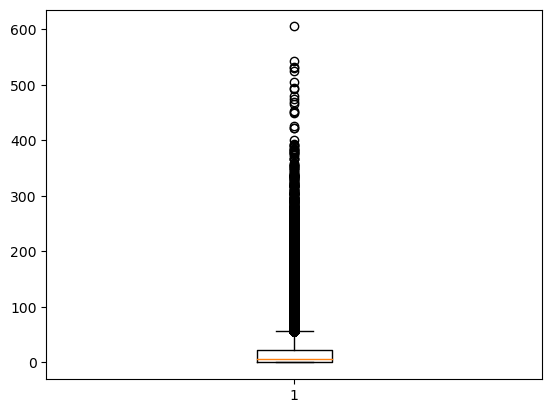

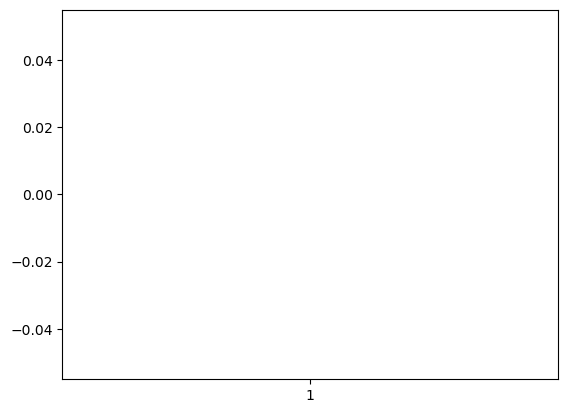

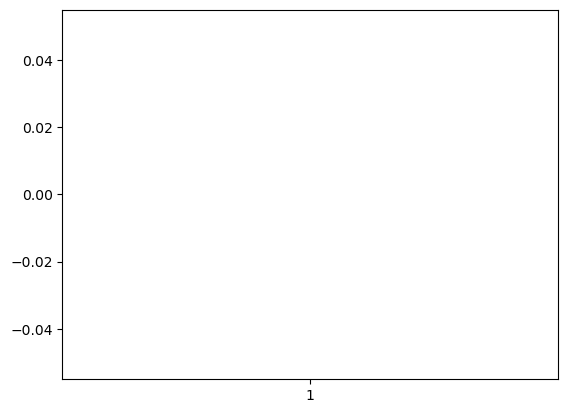

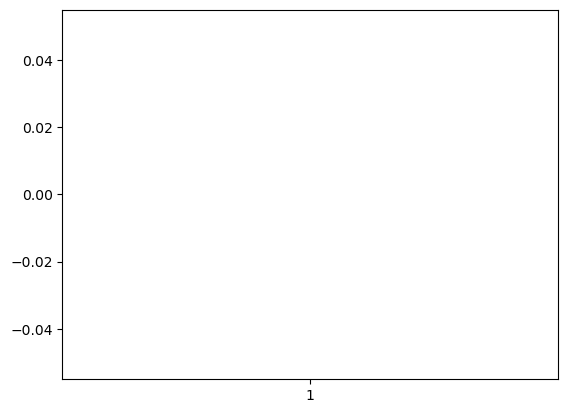

In [10]:
list_1 = ['log_price', 'accommodates', 'bathrooms', 'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds']
for i in list_1:
    plt.boxplot(df[i]) #строим боксплоты
    plt.show()

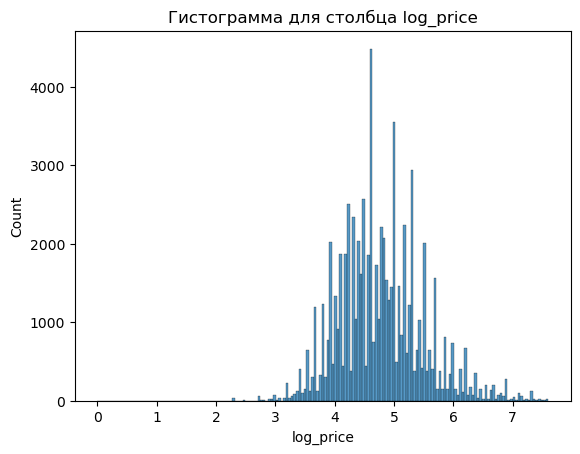

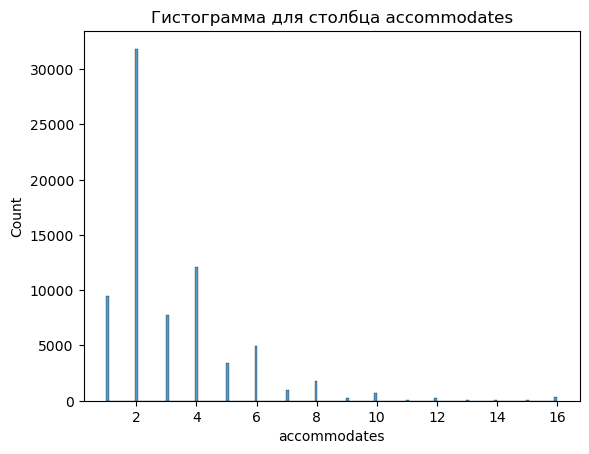

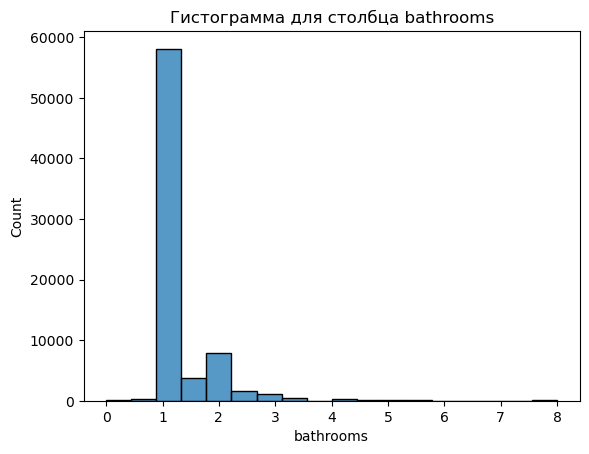

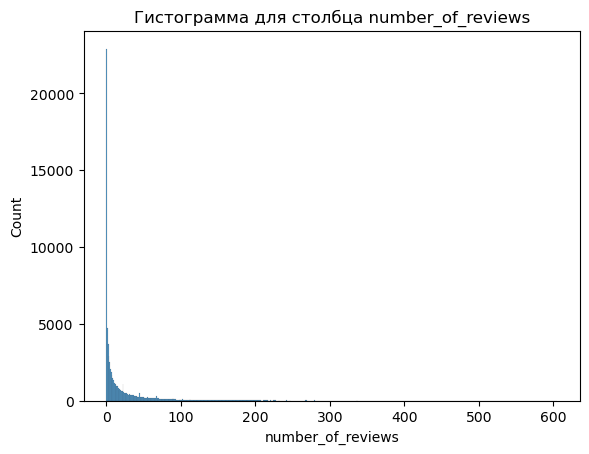

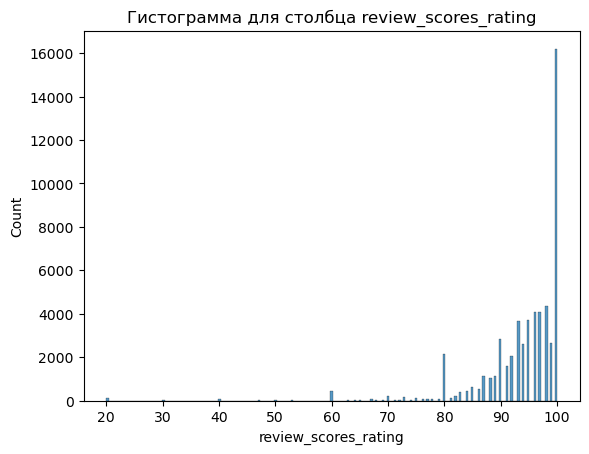

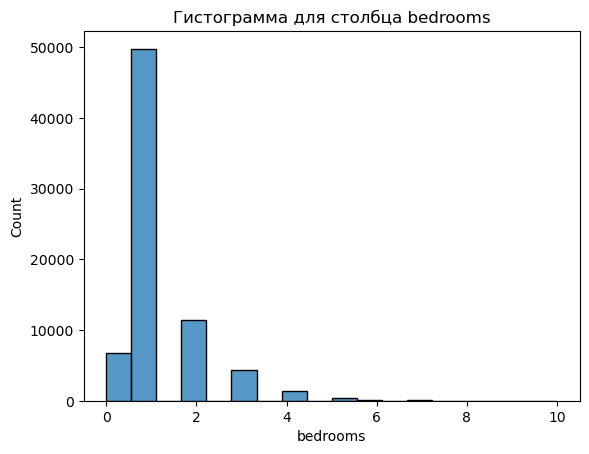

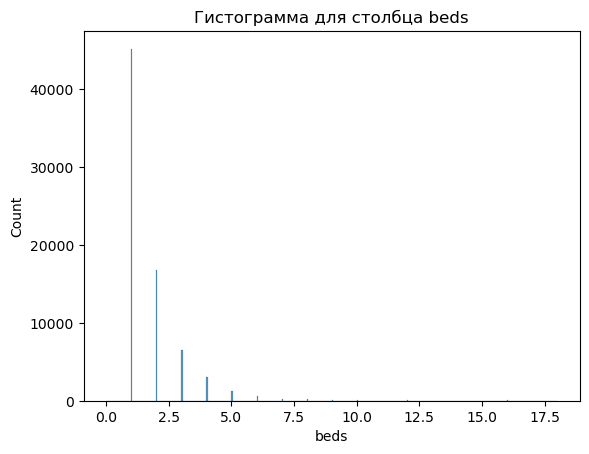

In [11]:
for i in list_1:
    sns.histplot(data=df[i])
    plt.title(f'Гистограмма для столбца {i}')
    plt.show()

In [12]:
def iqrr(df, columns):
    mu = df[columns].mean()
    sigma = df[columns].std()
    ej_h = mu + 3 * sigma
    ej_l = mu - 3 * sigma
    good_df = df[~((df[columns] < ej_l) | (df[columns] > ej_h)).any(axis=1)]
    return good_df


columnss = ['log_price', 'number_of_reviews', 'review_scores_rating']
good_df = iqrr(df, columnss)

### 3.Заполнение пропусков

In [13]:
good_df.isna().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   188
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15533
host_has_profile_pic        185
host_identity_verified      185
host_response_rate        17697
host_since                  185
instant_bookable              0
last_review               15496
latitude                      0
longitude                     0
name                          0
neighbourhood              6618
number_of_reviews             0
review_scores_rating      16384
thumbnail_url              7859
zipcode                     932
bedrooms                     87
beds                        126
dtype: int64

In [14]:
good_df['bathrooms'] = good_df['bathrooms'].fillna(good_df['bathrooms'].median())
good_df["bedrooms"] = good_df['bedrooms'].fillna((good_df["bathrooms"].median()))
good_df["beds"] = good_df["beds"].fillna((good_df["bathrooms"].median()))

C:\Users\Админ\AppData\Local\Temp\ipykernel_24948\1923720947.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_df['bathrooms'] = good_df['bathrooms'].fillna(good_df['bathrooms'].median())
C:\Users\Админ\AppData\Local\Temp\ipykernel_24948\1923720947.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_df["bedrooms"] = good_df['bedrooms'].fillna((good_df["bathrooms"].median()))
C:\Users\Админ\AppData\Local\Temp\ipykernel_24948\1923720947.py:3: SettingWithCopyWarning: 
A value is trying to be set on

In [15]:
good_df['last_review'].fillna(method="ffill",inplace=True)
good_df['first_review'].fillna(method="ffill",inplace=True)
good_df['host_since'].fillna(method="ffill",inplace=True)

C:\Users\Админ\AppData\Local\Temp\ipykernel_24948\2292928855.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_df['last_review'].fillna(method="ffill",inplace=True)
C:\Users\Админ\AppData\Local\Temp\ipykernel_24948\2292928855.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_df['first_review'].fillna(method="ffill",inplace=True)
C:\Users\Админ\AppData\Local\Temp\ipykernel_24948\2292928855.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

In [16]:
good_df["review_scores_rating"] = good_df["review_scores_rating"].fillna(0)

C:\Users\Админ\AppData\Local\Temp\ipykernel_24948\2783943517.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_df["review_scores_rating"] = good_df["review_scores_rating"].fillna(0)


In [17]:
good_df = good_df[good_df['neighbourhood'].notna()]

In [18]:
good_df.isna().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                     0
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review                  0
host_has_profile_pic        182
host_identity_verified      182
host_response_rate        16766
host_since                    0
instant_bookable              0
last_review                   0
latitude                      0
longitude                     0
name                          0
neighbourhood                 0
number_of_reviews             0
review_scores_rating          0
thumbnail_url              6946
zipcode                     559
bedrooms                      0
beds                          0
dtype: int64

### 4.Обработка типов данных

In [19]:
good_df['first_review'] = pd.to_datetime(good_df['first_review'], format='%Y-%m-%d')
good_df['last_review'] = pd.to_datetime(good_df['last_review'], format='%Y-%m-%d')

## Анализ данных

In [20]:
def plot_violinplot(h,v):
    plt.figure(figsize=(15,8))
    sns.set(font_scale=1.5)
    sns.violinplot(data=df, x=h, y=v, palette='GnBu_d')
    plt.title('Density and distribution of prices ', fontsize=15)
    plt.xlabel(h)
    plt.ylabel(v)

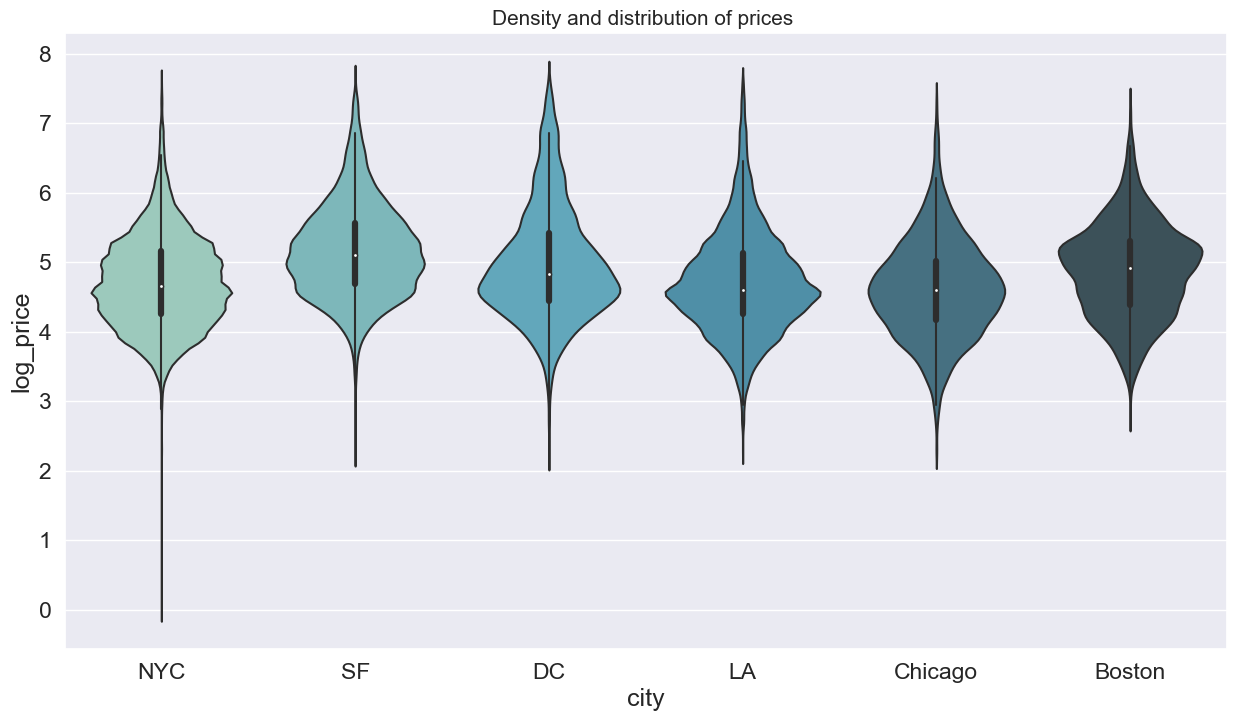

In [21]:
plot_violinplot("city","log_price")

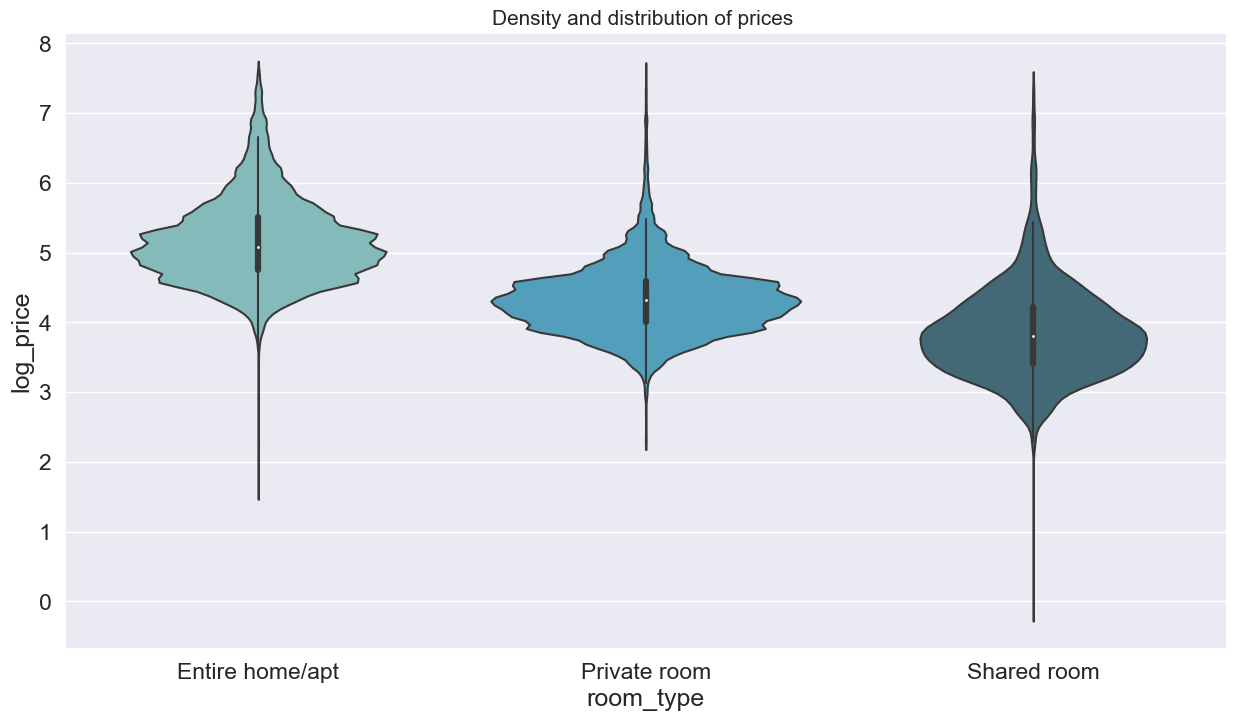

In [22]:
plot_violinplot("room_type","log_price")

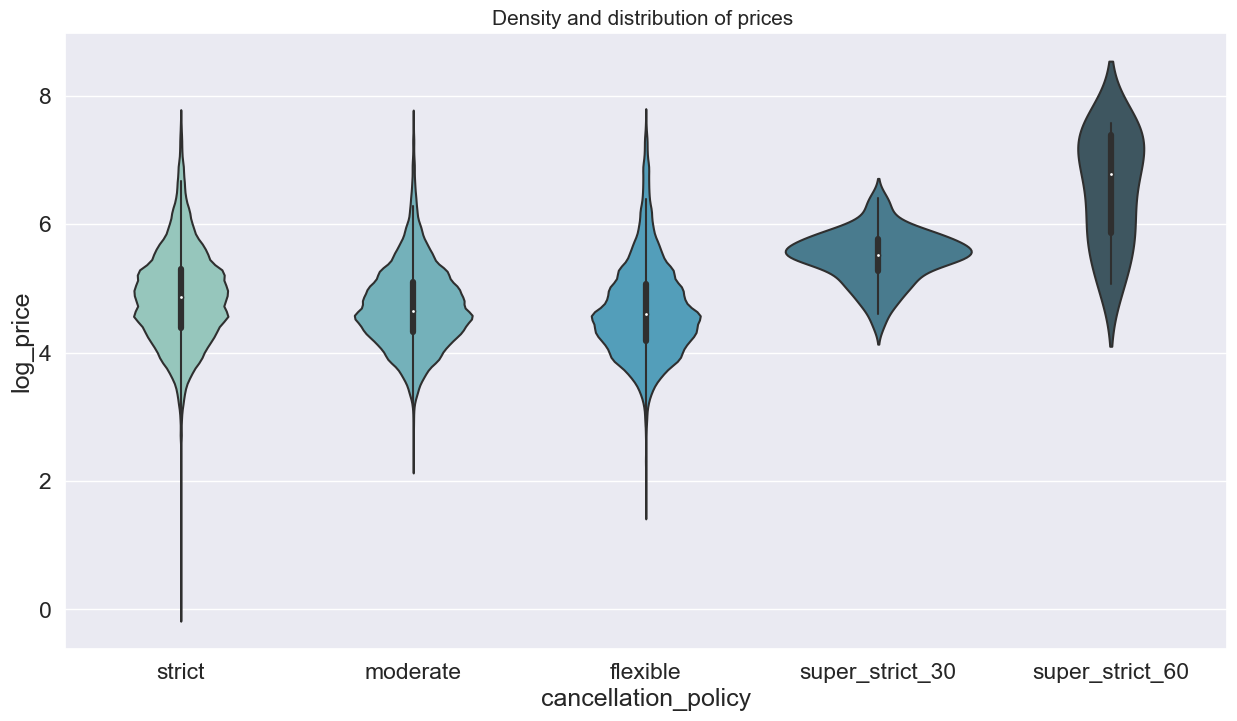

In [23]:
plot_violinplot("cancellation_policy","log_price")

In [24]:
good_df.dropna()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
5,12422935,4.442651,Apartment,Private room,"{TV,""Wireless Internet"",Heating,""Smoke detecto...",2,1.0,Real Bed,strict,True,...,37.753164,-122.429526,Comfort Suite San Francisco,Noe Valley,3,100.0,https://a0.muscache.com/im/pictures/82509143-4...,94131,1.0,1.0
7,13971273,4.787492,Condominium,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Wheelchair...",2,1.0,Real Bed,moderate,True,...,34.046737,-118.260439,"Near LA Live, Staple's. Starbucks inside. OWN ...",Downtown,9,93.0,https://a0.muscache.com/im/pictures/61bd05d5-c...,90015,1.0,1.0
10,5578513,4.605170,Apartment,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,Real Bed,strict,True,...,40.723883,-73.983880,Large East Village Bedroom To Let!,Alphabet City,82,93.0,https://a0.muscache.com/im/pictures/21726900/1...,10009.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74102,7935934,4.110874,Villa,Shared room,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",10,3.0,Real Bed,flexible,False,...,34.199671,-118.618070,UR SWEET HOME IN LA,West Hills,1,80.0,https://a0.muscache.com/im/pictures/27fea634-a...,91307,1.0,10.0
74103,11829011,5.135798,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2,1.0,Real Bed,moderate,True,...,37.789989,-122.407384,WorldMark W'ndm Union Square Studio,Union Square,24,98.0,https://a0.muscache.com/im/pictures/9a99e2de-c...,94108,1.0,1.0
74107,13281809,5.043425,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,2.0,Real Bed,moderate,True,...,33.871549,-118.396053,Spacious Hermosa 2 BR on PCH,Hermosa Beach,16,93.0,https://a0.muscache.com/im/pictures/2b86560b-a...,90254,2.0,4.0
74108,18688039,5.220356,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",5,1.0,Real Bed,moderate,True,...,40.706749,-73.942377,Modern 2 Bedroom Apartment in Williamsburg,Williamsburg,43,94.0,https://a0.muscache.com/im/pictures/7fbe448c-5...,11206.0,2.0,2.0


In [25]:
plot_kws = {'scatter_kws': {'s': 2}, 'line_kws': {'color': 'red'}}
sns.pairplot(, kind='reg', vars=data.columns[:-1], plot_kws=plot_kws)
plt.show()

SyntaxError: invalid syntax (37083093.py, line 2)

In [ ]:
good_df

In [ ]:
data = good_df[['log_price','review_scores_rating']]
data

In [ ]:
plot_kws = {'scatter_kws': {'s': 2}, 'line_kws': {'color': 'red'}}
sns.pairplot(good_df[['log_price','review_scores_rating']], kind='reg', vars=good_df[['log_price','review_scores_rating']].columns[:-1], plot_kws=plot_kws)
plt.show()

In [ ]:
from pycaret.clustering import *
from sklearn.datasets import make_blobs
mpl.rcParams['figure.dpi'] = 300

In [ ]:
good_df.info()

КЛАСТЕРНЫЙ АНАЛИЗ

In [26]:
data = good_df[['log_price','review_scores_rating','number_of_reviews']]
data

,log_price,review_scores_rating,number_of_reviews
0,5.010635,100.0,2
1,5.129899,93.0,6
2,4.976734,92.0,10
3,6.620073,0.0,0
5,4.442651,100.0,3
...,...,...,...
74103,5.135798,98.0,24
74106,4.605170,0.0,0
74107,5.043425,93.0,16
74108,5.220356,94.0,43


In [27]:
data['log_price'] = (data['log_price'] - data['log_price'].min()) / (data['log_price'].max() - data['log_price'].min())
data['review_scores_rating'] = (data['review_scores_rating'] - data['review_scores_rating'].min()) / (data['review_scores_rating'].max() - data['review_scores_rating'].min())
data['number_of_reviews'] = (data['number_of_reviews'] - data['number_of_reviews'].min()) / (data['number_of_reviews'].max() - data['number_of_reviews'].min())
data

C:\Users\Админ\AppData\Local\Temp\ipykernel_24948\615209971.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['log_price'] = (data['log_price'] - data['log_price'].min()) / (data['log_price'].max() - data['log_price'].min())
C:\Users\Админ\AppData\Local\Temp\ipykernel_24948\615209971.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['review_scores_rating'] = (data['review_scores_rating'] - data['review_scores_rating'].min()) / (data['review_scores_rating'].max() - data['review_scores_rating'].

,log_price,review_scores_rating,number_of_reviews
0,0.552379,1.00,0.014925
1,0.580157,0.93,0.044776
2,0.544483,0.92,0.074627
3,0.927243,0.00,0.000000
5,0.420086,1.00,0.022388
...,...,...,...
74103,0.581531,0.98,0.179104
74106,0.457939,0.00,0.000000
74107,0.560016,0.93,0.119403
74108,0.601226,0.94,0.320896


In [28]:
data = data[data['review_scores_rating'] != 0]

In [29]:
X=data.values

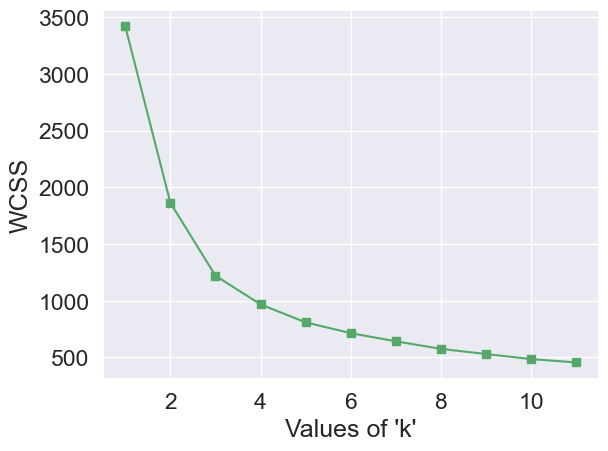

In [34]:
from sklearn.cluster import KMeans
wcss = {} 
for i in range(1, 12): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X) 
    wcss[i] = kmeans.inertia_
     
plt.plot(wcss.keys(), wcss.values(), 'gs-')
plt.xlabel("Values of 'k'")
plt.ylabel('WCSS')
plt.show()

In [32]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [33]:
kmeans.cluster_centers_

array([[0.6334553 , 0.95362483, 0.09198367],
       [0.49139145, 0.94068608, 0.5694733 ],
       [0.38170968, 0.94471054, 0.08832077]])

In [94]:
data['clusters'] = kmeans.labels_.tolist()
data

C:\Users\Админ\AppData\Local\Temp\ipykernel_17176\904592455.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['clusters'] = kmeans.labels_.tolist()


,log_price,review_scores_rating,number_of_reviews,clusters
0,0.552379,1.00,0.014925,2
1,0.580157,0.93,0.044776,2
2,0.544483,0.92,0.074627,2
5,0.420086,1.00,0.022388,0
7,0.500405,0.93,0.067164,0
...,...,...,...,...
74100,0.457939,0.93,0.238806,0
74102,0.342810,0.80,0.007463,0
74103,0.581531,0.98,0.179104,2
74107,0.560016,0.93,0.119403,2


In [95]:
pca=PCA(n_components=2)
 
reduced_X=pd.DataFrame(data=pca.fit_transform(X),columns=['PCA1','PCA2'])
 
#Reduced Features
reduced_X.head()

,PCA1,PCA2
0,-0.153796,0.058197
1,-0.122496,0.083346
2,-0.092316,0.047431
3,-0.145907,-0.073963
4,-0.099855,0.003747


In [96]:
centers=pca.transform(kmeans.cluster_centers_)
 
# reduced centers
centers

array([[-0.0796709 , -0.10937169],
       [ 0.4014619 , -0.00320565],
       [-0.07482345,  0.14374726]])

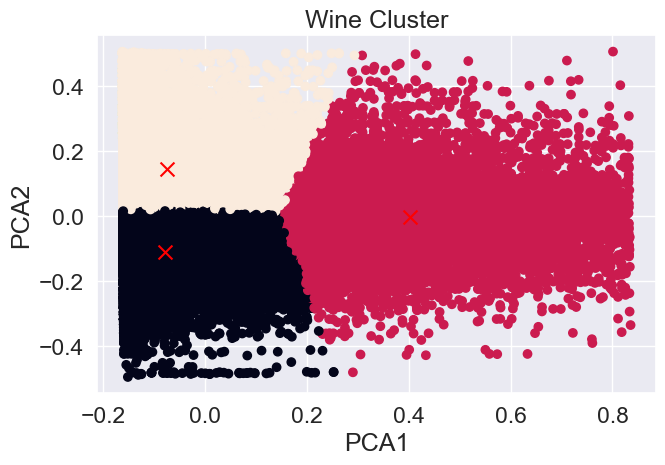

In [97]:
plt.figure(figsize=(7,5))
 
# Scatter plot
plt.scatter(reduced_X['PCA1'],reduced_X['PCA2'],c=kmeans.labels_)
plt.scatter(centers[:,0],centers[:,1],marker='x',s=100,c='red')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Wine Cluster')
plt.tight_layout()